# Final ROSCOE scoring of CausalBench

## Preparing datasets 

### Merge ID, prompt, pred

In [88]:
# common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import re
from typing import Union, List, Tuple, Dict, Any, Optional

In [87]:
# read two cvs files
overall_result = pd.read_csv("raw_datasets/bern_cna_35_gpt4cot.csv")
overall_result.head()

,ID,descriptive_id,sensical,query_type,rung,phenomenon,simpson,truth,prompt,truth_norm,pred
0,4669,confounding_a_ett_gender_pay,-1,ett,3,confounding,False,yes,"Imagine a self-contained, hypothetical world w...",1,No
1,4046,collision_n_nie_nonsense0,0,nie,3,collision,False,no,"Imagine a self-contained, hypothetical world w...",0,No
2,1597,arrowhead_c_ett_floor_wet,1,ett,3,arrowhead,False,yes,"Imagine a self-contained, hypothetical world w...",1,Yes
3,2995,chain_a_nie_smoking_gene_cancer,-1,nie,3,chain,False,yes,"Imagine a self-contained, hypothetical world w...",1,No
4,9475,nondet-diamondcut_c_nde_smoking_frontdoor,1,nde,3,nondet-diamondcut,False,yes,"Imagine a self-contained, hypothetical world w...",1,Yes


In [89]:
# keep just ID and prompt columns
overall_result = overall_result[["ID", "prompt"]]
overall_result.head()

,ID,prompt
0,4669,"Imagine a self-contained, hypothetical world w..."
1,4046,"Imagine a self-contained, hypothetical world w..."
2,1597,"Imagine a self-contained, hypothetical world w..."
3,2995,"Imagine a self-contained, hypothetical world w..."
4,9475,"Imagine a self-contained, hypothetical world w..."


In [90]:
prompt2gpt_response_lookup = pd.read_csv("raw_datasets/cache_gpt4_responses.csv")
prompt2gpt_response_lookup.head()

,pred,query
0,"No, the prisoner being alive cannot be guarant...",We know that captain commands causes rifleman1...
1,pred,query
2,"No, we cannot definitively conclude that the s...",principal's direction makes teacher1 and teach...
3,"No, based on the information provided, we cann...",principal's anger makes teacher1 and teacher2 ...
4,"No, the student might not necessarily be alive...",We know that captain commands causes professor...


In [91]:
# print full contennt of thrid row
print(prompt2gpt_response_lookup.iloc[3, 1])

principal's anger makes teacher1 and teacher2 to blame the student. If either teacher1 of teacher2 blame the student, the student become emotionally damaged. We observed the principal wasn't angry. Would the student be emotionally damaged if teacher2 blame the student?  
Start your answer with "Yes", or "No", followed by step-by-step reasoning to support your explanation.


In [92]:
# Using the "prompt" from overall_result df, look up the GPT4’s reasoning chain in the .cache_gpt4_responses.csv file (use "query" to look up "pred").
# If the "pred" is not empty, then add the "pred" to the overall_result df.

overall_result["pred"] = overall_result["prompt"].apply(
    lambda x: prompt2gpt_response_lookup[prompt2gpt_response_lookup["query"] == x][
        "pred"
    ].values[0]
    if len(
        prompt2gpt_response_lookup[prompt2gpt_response_lookup["query"] == x][
            "pred"
        ].values
    )
    > 0
    else np.nan
)
overall_result.head()

,ID,prompt,pred
0,4669,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...
1,4046,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...
2,1597,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...
3,2995,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...
4,9475,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...


In [93]:
# print full contennt of first row
print(overall_result.iloc[405, 1])
print("#" * 100)
print(overall_result.iloc[405, 2])

Imagine a self-contained, hypothetical world with only the following conditions, and without any unmentioned factors or causal relationships: Smoking mother has a direct effect on low infant birth weight and infant mortality. Low infant birth weight has a direct effect on infant mortality. For children with nonsmoking mothers, the probability of infant mortality is 58.03%. For children with smoking mothers, the probability of infant mortality is 58.53%. Will smoking mother increase the chance of infant mortality?

Hint: You can answer the question by following the subquestions below:

Step 1) Extract the causal graph: What is the causal graph expressed in the context? Use "X" to denote "maternal smoking status". Use "V2" to denote "infant's birth weight". Use "Y" to denote "infant mortality". Answer nothing else but each edge one by one, in the format of "var1 -> var2", and use "," to separate the edges.

Step 2) Identify the query type: What is the query type of the above question? Ch

In [94]:
# print len of overall_result
print(len(overall_result))
# new df with no null values
overall_result_no_null = overall_result.dropna()
# print len of new df
print(len(overall_result_no_null))

4489
4489


In [95]:
# Check if there are two identical entries in pred column
overall_result_no_null["pred"].value_counts()

Step 1) Extract the causal graph: The causal graph expressed in the context is as follows: V1 -> X, V1 -> Y, X -> Y.\n\nStep 2) Identify the query type: The query type of the above question is "backdoor adjustment set".\n\nStep 3) Translate the query to an estimand: Based on the type of the causal query, the question can be translated to a formal estimand as E[Y|do(X)].\n\nStep 4) Collect all the available data: We do not have any specific data provided in the question. However, we know the causal relationships: P(V1 -> X), P(V1 -> Y), and P(X -> Y).\n\nStep 5) Solve for the estimand: Given all the information above, we can solve for the estimand E[Y|do(X)] using the backdoor adjustment set. Since V1 is a common cause of both X and Y, we need to condition on V1 to block the backdoor path from X to Y through V1. Therefore, we can estimate the causal effect of X on Y by looking at the correlation between X and Y case by case according to V1 (snov). So the answer is "No".                 

In [96]:
# Check if there are two identical entries in prompt column
overall_result_no_null["prompt"].value_counts()

Imagine a self-contained, hypothetical world with only the following conditions, and without any unmentioned factors or causal relationships: Snov has a direct effect on rujx and nyrp. Rujx has a direct effect on nyrp.  To understand how rujx affects nyrp, should we look directly at how rujx correlates with nyrp in general, or this correlation case by case according to snov? Use "Yes" to indicate the former, and "No" to indicate the latter.\n\nHint: You can answer the question by following the subquestions below:\n\nStep 1) Extract the causal graph: What is the causal graph expressed in the context? Use "V1" to denote "snov". Use "X" to denote "rujx". Use "Y" to denote "nyrp". Answer nothing else but each edge one by one, in the format of "var1 -> var2", and use "," to separate the edges.\n\nStep 2) Identify the query type: What is the query type of the above question? Choose one from "marginal probability", "conditional probability", "explaining away effect", "backdoor adjustment set"

### Build GT

In [98]:
# Helper function to search a nested dictionary
def search_nested_dict(nested_dict, target_key):
    queue = [(nested_dict, key) for key in nested_dict]

    while queue:
        current_dict, key = queue.pop(0)

        if key == target_key:
            return current_dict[key]

        if isinstance(current_dict[key], type({})):
            for sub_key in current_dict[key]:
                queue.append((current_dict[key], sub_key))
    return None

In [99]:
# Read txt file
with open(
    "raw_datasets/ground_truth_reasoning_template.txt", "r", encoding="utf-8"
) as file:
    reasoning_template = file.read()
print(reasoning_template)

Step 1) Extract the causal graph: The causal graph expressed in the context is: "{graph}".

Step 2) Identify the query type: The query type of the above question is "{query_type}".

Step 3) Translate the query to an estimand: Based on the type of the causal query, the question can be translated to a formal estimand as: "{step1}".

Step 4) Collect all the available data: The available data are: "{given_info_formal}".

Step 5) Solve for the estimand: To solve for the estimand, we need to compute {step1_format}.

Using the causal graph, we can simplify the estimand to
{step1}
= {step2}

Using the available data, we can calculate:
{step2}
= {step3}
≈ {step4}

Since the estimate for the estimand is {step4}, the overall answer to the question is "{answer}".





In [100]:
# Get formatting keys of reasoning template
reasoning_template_keys = re.findall(r"\{(.+?)\}", reasoning_template)
reasoning_template_keys

['graph',
 'query_type',
 'step1',
 'given_info_formal',
 'step1_format',
 'step1',
 'step2',
 'step2',
 'step3',
 'step4',
 'step4',
 'answer']

In [127]:
# Load the json file as a list of nested dictionary
import json

with open("raw_datasets/bern_cna_35.json") as f:
    nested_dicts = json.load(f)

{'ID': 5667,
 'descriptive_id': 'frontdoor_n_correlation_nonsense4',
 'sensical': 0,
 'story_id': 'nonsense4',
 'background': 'Imagine a self-contained, hypothetical world with only the following conditions, and without any unmentioned factors or causal relationships: Zeku has a direct effect on czir and xevi. Czir has a direct effect on swoy. Swoy has a direct effect on xevi. Zeku is unobserved.',
 'given_info': 'For those who are not czir, the probability of xevi is 62.32%. For those who are czir, the probability of xevi is 59.35%.',
 'question': 'Is the chance of xevi larger when observing czir?',
 'variable_mapping': {'V3name': 'swoy',
  'V30': 'not swoy',
  'V31': 'swoy',
  'V1name': 'zeku',
  'V10': 'not zeku',
  'V11': 'zeku',
  'Xname': 'czir',
  'X0': 'not czir',
  'X1': 'czir',
  'Yname': 'xevi',
  'Y0': 'not xevi',
  'Y1': 'xevi'},
 'answer': 'no',
 'meta': {'phenomenon': 'frontdoor',
  'graph': 'V1->X,V1->Y,X->V3,V3->Y',
  'nodes': ['V1', 'X', 'V3', 'Y'],
  'structuralEqs_t

In [102]:
# Create df with ID comlumn of same lenght as nested_dict
df = pd.DataFrame({"ID": [i for i in range(len(nested_dicts))]})
# Extract query_type, graph, step0, step1, step2, step3, step4, answer, given_info_formal, from nested_dict and add them to df
df["query_type"] = df["ID"].apply(
    lambda x: search_nested_dict(nested_dicts[x], "query_type")
)
df["graph"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "graph"))
df["step0"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "step0"))
df["step1"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "step1"))
df["step2"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "step2"))
df["step3"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "step3"))
df["step4"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "step4"))
df["answer"] = df["ID"].apply(lambda x: search_nested_dict(nested_dicts[x], "answer"))
df["given_info_formal"] = df["ID"].apply(
    lambda x: search_nested_dict(nested_dicts[x], "given_info_formal")
)
df.head()

,ID,query_type,graph,step0,step1,step2,step3,step4,answer,given_info_formal
0,0,ate,"V1->X,V1->Y,V2->X,X->Y",E[Y|do(X = 1)] − E[Y|do(X = 0)],P(Y=1|do(X=1)) - P(Y=1|do(X=1)),[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V...,[0.5671622485-0.6026637459]/[0.2-0.14],-0.5917,no,"[P(Y=1|V2=0)=0.6026637459, P(Y=1|V2=1)=0.56716..."
1,1,ate,"V1->X,V1->Y,V2->X,X->Y",E[Y|do(X = 1)] − E[Y|do(X = 0)],P(Y=1|do(X=1)) - P(Y=1|do(X=1)),[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V...,[0.39733441500000005-0.44394854770000003]/[0.9...,-0.1227,no,"[P(Y=1|V2=0)=0.44394854770000003, P(Y=1|V2=1)=..."
2,2,ate,"V1->X,V1->Y,V2->X,X->Y",E[Y|do(X = 1)] − E[Y|do(X = 0)],P(Y=1|do(X=1)) - P(Y=1|do(X=1)),[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V...,[0.39733441500000005-0.44394854770000003]/[0.9...,-0.1227,no,"[P(Y=1|V2=0)=0.44394854770000003, P(Y=1|V2=1)=..."
3,3,ate,"V1->X,V1->Y,V2->X,X->Y",E[Y|do(X = 1)] − E[Y|do(X = 0)],P(Y=1|do(X=1)) - P(Y=1|do(X=1)),[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V...,[0.2000484216-0.3129399888]/[0.8-0.5],-0.3763,no,"[P(Y=1|V2=0)=0.3129399888, P(Y=1|V2=1)=0.20004..."
4,4,ate,"V1->X,V1->Y,V2->X,X->Y",E[Y|do(X = 1)] − E[Y|do(X = 0)],P(Y=1|do(X=1)) - P(Y=1|do(X=1)),[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V...,[0.5671622485-0.6026637459]/[0.2-0.14],-0.5917,no,"[P(Y=1|V2=0)=0.6026637459, P(Y=1|V2=1)=0.56716..."


In [105]:
# Drop rows with null values in step0, step1, step2, step3, step4
print(len(df))
df = df.dropna(subset=["step0", "step1", "step2", "step3", "step4"])
print(len(df))

4485
4485


In [106]:
# Fill the reasoning_template with values from the dataframe
gt_reasonings = []
for index, row in df.iterrows():
    # Join the elements in the 'given_info_formal' column into a string
    given_info_formal_string = "; ".join(row["given_info_formal"])

    # Replace ' - ' with ' and ' in 'step1'
    step1_replaced = row["step1"].replace(" - ", " and ")

    # Create a dictionary from the row
    row_dict = row.to_dict()

    # Replace the 'given_info_formal' with the joined string
    row_dict["given_info_formal"] = given_info_formal_string

    # Replace the 'step1' with the replaced string
    row_dict["step1_format"] = step1_replaced

    # Now, format the template
    reasoning_template_filled = reasoning_template.format(**row_dict)
    # make dict of ID and reasoning_template_filled
    gt_reasonings.append(
        {"ID": row_dict["ID"], "gt_reasoning": reasoning_template_filled}
    )
print(gt_reasonings[0])

{'ID': 0, 'gt_reasoning': 'Step 1) Extract the causal graph: The causal graph expressed in the context is: "V1->X,V1->Y,V2->X,X->Y".\n\nStep 2) Identify the query type: The query type of the above question is "ate".\n\nStep 3) Translate the query to an estimand: Based on the type of the causal query, the question can be translated to a formal estimand as: "P(Y=1|do(X=1)) - P(Y=1|do(X=1)) ".\n\nStep 4) Collect all the available data: The available data are: "P(Y=1|V2=0)=0.6026637459; P(Y=1|V2=1)=0.5671622485; P(X=1|V2=0)=0.14; P(X=1|V2=1)=0.2".\n\nStep 5) Solve for the estimand: To solve for the estimand, we need to compute P(Y=1|do(X=1)) and P(Y=1|do(X=1)) .\n\nUsing the causal graph, we can simplify the estimand to\nP(Y=1|do(X=1)) - P(Y=1|do(X=1)) \n= [P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V2=0)]\n\nUsing the available data, we can calculate:\n[P(Y=1|V2=1)-P(Y=1|V2=0)]/[P(X=1|V2=1)-P(X=1|V2=0)]\n= [0.5671622485-0.6026637459]/[0.2-0.14]\n≈ -0.5917\n\nSince the estimate for the es

In [107]:
# Save the gt_reasonings as a jsonl file
with open("raw_datasets/id2truth_reasoning.jsonl", "w") as f:
    for item in gt_reasonings:
        f.write(json.dumps(item) + "\n")

In [108]:
# Read the jsonl as a pandas dataframe
gt_reasonings_df = pd.read_json("raw_datasets/id2truth_reasoning.jsonl", lines=True)
gt_reasonings_df.head()

,ID,gt_reasoning
0,0,Step 1) Extract the causal graph: The causal g...
1,1,Step 1) Extract the causal graph: The causal g...
2,2,Step 1) Extract the causal graph: The causal g...
3,3,Step 1) Extract the causal graph: The causal g...
4,4,Step 1) Extract the causal graph: The causal g...


In [132]:
len(gt_reasonings_df)

4485

In [109]:
# Merge overall_result_no_null and gt_reasonings_df on ID
overall_result_gt = overall_result_no_null.merge(gt_reasonings_df, on="ID")
overall_result_gt.head()

,ID,prompt,pred,gt_reasoning
0,4669,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...,Step 1) Extract the causal graph: The causal g...
1,1597,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...,Step 1) Extract the causal graph: The causal g...
2,2995,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...,Step 1) Extract the causal graph: The causal g...
3,9475,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...,Step 1) Extract the causal graph: The causal g...
4,6328,"Imagine a self-contained, hypothetical world w...",Step 1) Extract the causal graph: The causal g...,Step 1) Extract the causal graph: The causal g...


In [110]:
# Check if there are empty entries in any column
overall_result_gt.isnull().sum()

ID              0
prompt          0
pred            0
gt_reasoning    0
dtype: int64

In [112]:
# Check final size of overall_result_gt
len(overall_result_gt)

2060

### Create bern_cna_35_true_reasoning.json

In [133]:
# Add a new field in the gt_reasoning in nested_dicts
updated_nested_dicts = nested_dicts
for index, row in gt_reasonings_df.iterrows():
    updated_nested_dicts[row["ID"]]["truth_reasoning"] = row["gt_reasoning"]
updated_nested_dicts[0]

{'ID': 0,
 'descriptive_id': 'IV_a_ate_water_cholera',
 'sensical': -1,
 'story_id': 'water_cholera',
 'background': 'Imagine a self-contained, hypothetical world with only the following conditions, and without any unmentioned factors or causal relationships: Low poverty rate has a direct effect on window-shopping and cholera prevention. Water company B has a direct effect on window-shopping. Window-shopping has a direct effect on cholera prevention. Poverty level of the region is unobserved.',
 'given_info': 'For individuals served by water company A, the probability of cholera prevention is 60.27%. For individuals served by water company B, the probability of cholera prevention is 56.72%. For individuals served by water company A, the probability of window-shopping is 14.00%. For individuals served by water company B, the probability of window-shopping is 20.00%.',
 'question': 'Will window-shopping increase the chance of cholera prevention?',
 'variable_mapping': {'V2name': 'water c

In [135]:
# Save nested_dicts as a json file
with open("raw_datasets/bern_cna_35_true_reasoning.json", "w") as f:
    json.dump(updated_nested_dicts, f)

In [136]:
# load bern_cna_35_true_reasoning.json
with open("raw_datasets/bern_cna_35_true_reasoning.json") as f:
    nested_dicts1 = json.load(f)

# count number of entries with truth_reasoning
count = 0
for i in range(len(nested_dicts1)):
    if "truth_reasoning" in nested_dicts1[i]:
        count += 1
print(count)

4485


## Formatting for ROSCOE

In [113]:
def prepare_json_for_roscoe(
    df: pd.DataFrame,
    prompt_column: str,
    gpt_column: str,
    out_name: str,
    gt_column: Union[str, None] = None,
    id_column: Union[str, None] = None,
) -> None:
    df_out = df[[prompt_column, gpt_column]]
    df_out.rename(columns={gpt_column: "gpt-3", prompt_column: "premise"}, inplace=True)
    # As strange as it sounds, hypotesis column is used for ground truth, left empty otherwise
    if gt_column is not None:
        df_out["hypothesis"] = (
            "IGNORE THIS. Ground truth here for reference. " + df[gt_column]
        )
    else:
        df_out["hypothesis"] = " "
    if id_column is not None:
        df_out["ID"] = df[id_column]

    df_out.to_json("datasets/" + out_name + ".jsonl", orient="records", lines=True)
    return None

In [114]:
prepare_json_for_roscoe(
    overall_result_gt,
    "prompt",
    "pred",
    "cb_gt",
    gt_column="gt_reasoning",
    id_column="ID",
)

/local/home/zhijing/proj/tools/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-113-8343e09033f3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["hypothesis"] = (


## Run ROSCOE

From the ParlAI root repository folder: 
```python
python projects/roscoe/roscoe.py -t sim_sce -m facebook/roscoe-512-roberta-base --dataset-path ../CausalLLMs/roscoe_exp/datasets --datasets cb2
```

**IMPORTANT**: to obtain also the supervised scores, the dataset name should inculde gt e.g. name your dataset `cb_gt.jsonl` and pass `cb_gt` as an argument

## Analysis and visualizations

In [57]:
import re


def clean_tsv(filename):
    # Open the file in read mode
    with open(filename, "r") as file:
        # Read the file contents and store it in a variable
        file_contents = file.read()

    # Remove all excessive white spaces
    clean_contents = re.sub(" +", " ", file_contents)

    # Open the file in write mode
    with open(filename, "w") as file:
        # Write the cleaned contents back to the file
        file.write(clean_contents)

In [77]:
clean_tsv("scores/roscoe-512-roberta-base/scores_cb2.tsv")
df_scores = pd.read_table(
    "scores/roscoe-512-roberta-base/scores_cb2.tsv", sep=" ", header=0
)
df_scores.drop(columns=["ID"], inplace=True)
df_scores.head()

,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0.968362,0.918402,0.878924,0.964252,0.027852,0.023171,0.046803,0.646053,0.084928,0.211185,0.014396,0.915029,0.663374
1,0.940531,0.914752,0.869218,0.972617,0.037163,0.032476,0.000570,0.018564,0.032771,0.103065,0.014396,0.905776,0.453010
2,0.940439,0.912106,0.927187,0.970973,0.047384,0.026998,0.019033,0.366958,0.023175,0.073830,0.009735,0.982251,0.966039
3,0.950651,0.908429,0.843166,0.928078,0.021383,0.045313,0.013847,0.329307,0.082836,0.278927,0.010968,0.975609,0.920538
4,0.942967,0.917354,0.894124,0.974889,0.041948,0.016515,0.007349,0.889339,0.032383,0.145472,0.008327,0.969711,0.896828


In [75]:
# Bases stats
df_scores.describe()

,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,0.897339,0.886721,0.896390,0.953152,0.035601,0.028852,0.119963,0.181379,0.030934,0.124387,0.008586,0.926131,0.677643
std,0.014669,0.011840,0.034196,0.019791,0.010220,0.013235,0.197434,0.272297,0.021488,0.069665,0.004717,0.055780,0.292659
min,0.826695,0.842966,0.760660,0.898652,0.001386,0.000223,0.000180,0.000405,0.003435,0.042284,0.000088,0.689844,0.024506
25%,0.888416,0.879233,0.881748,0.943084,0.030826,0.017770,0.002593,0.007637,0.017062,0.074485,0.004550,0.893118,0.563705
50%,0.898427,0.887651,0.901172,0.961895,0.037116,0.029379,0.011964,0.030721,0.021975,0.097779,0.009735,0.943070,0.773873
75%,0.907260,0.894806,0.916890,0.967002,0.043209,0.039539,0.142010,0.262102,0.036430,0.170343,0.013078,0.971575,0.903474
max,0.936876,0.918339,0.972259,0.976682,0.057096,0.061954,0.768386,0.949052,0.126940,0.364336,0.019938,0.989711,0.985590


In [76]:
# Bases stats to latex table
print(df_scores.describe().to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  faithfulness &  informativeness\_step &  informativeness\_chain &  faithfulness\_ww &  repetition\_word &  repetition\_step &  discourse\_representation &  coherence\_step\_vs\_step &  perplexity\_step &  perplexity\_chain &  perplexity\_step\_max &  grammar\_step &  grammar\_step\_max \\
\midrule
count &    612.000000 &            612.000000 &             612.000000 &       612.000000 &       612.000000 &       612.000000 &                612.000000 &              612.000000 &       612.000000 &        612.000000 &           612.000000 &    612.000000 &        612.000000 \\
mean  &      0.897339 &              0.886721 &               0.896390 &         0.953152 &         0.035601 &         0.028852 &                  0.119963 &                0.181379 &         0.030934 &          0.124387 &             0.008586 &      0.926131 &          0.677643 \\
std   &      0.014669 &              0.011840 &               0.034196 &         0.01979

array([[<AxesSubplot:title={'center':'faithfulness'}>,
        <AxesSubplot:title={'center':'informativeness_step'}>,
        <AxesSubplot:title={'center':'informativeness_chain'}>],
       [<AxesSubplot:title={'center':'faithfulness_ww'}>,
        <AxesSubplot:title={'center':'repetition_word'}>,
        <AxesSubplot:title={'center':'repetition_step'}>],
       [<AxesSubplot:title={'center':'discourse_representation'}>,
        <AxesSubplot:title={'center':'coherence_step_vs_step'}>,
        <AxesSubplot:title={'center':'perplexity_step'}>],
       [<AxesSubplot:title={'center':'perplexity_chain'}>,
        <AxesSubplot:title={'center':'perplexity_step_max'}>,
        <AxesSubplot:title={'center':'grammar_step'}>],
       [<AxesSubplot:title={'center':'grammar_step_max'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

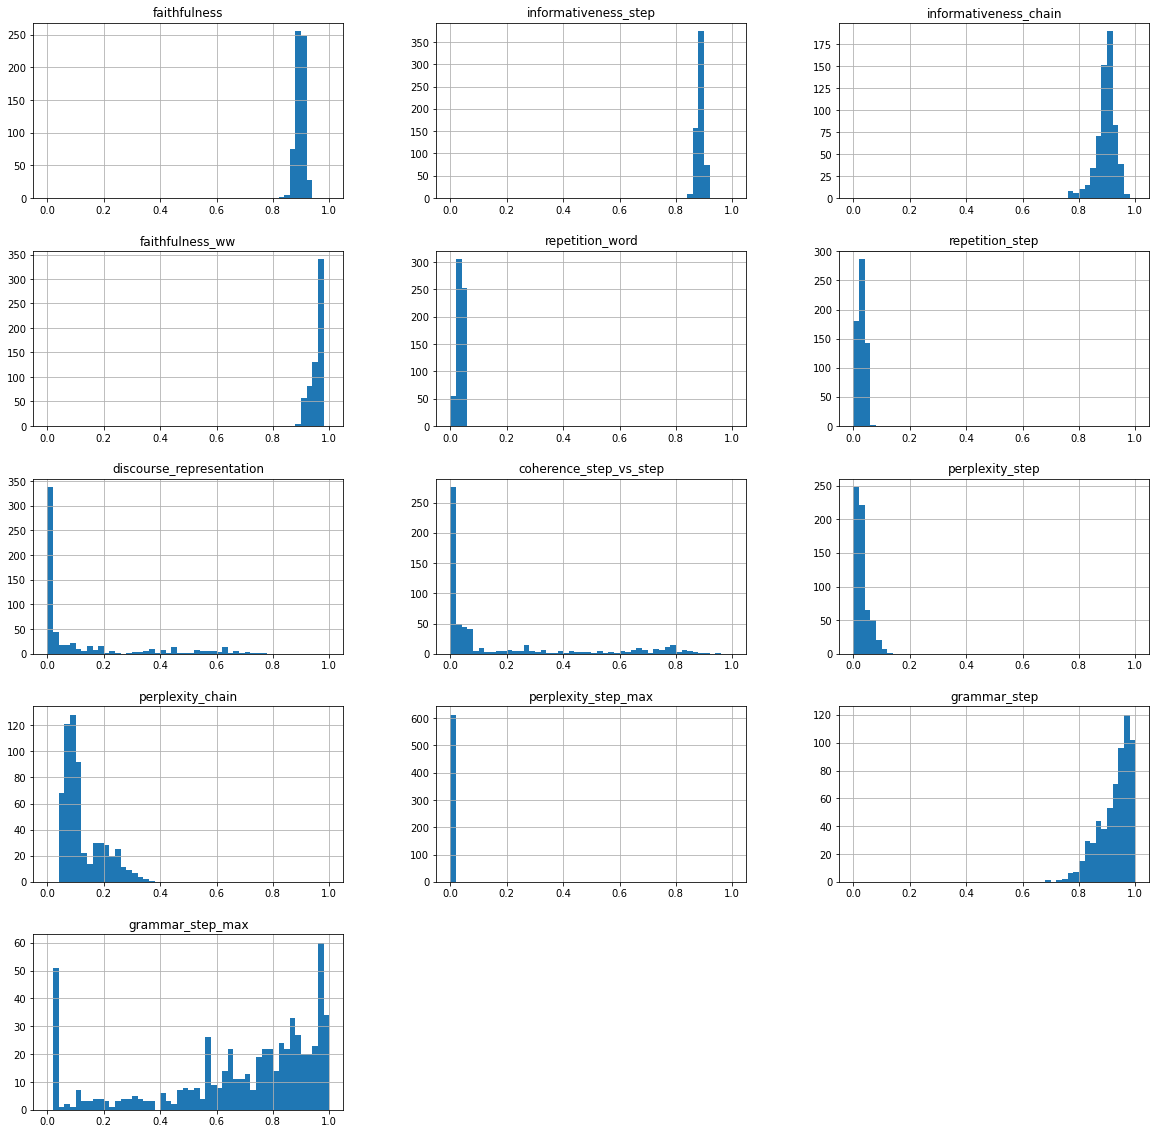

In [74]:
# histogram of the scores, bins=50, range=(0,1), figsize=(20,20), layout=(2,2)

df_scores.hist(bins=50, range=(0, 1), figsize=(20, 20), layout=(5, 3))

## TESTING AUTOMTED SCRIPT


In [81]:
import time

while True:
    if not os.path.exists("./delete_me_to_stop_script.txt"):
        break

    try:
        print("Running...")
    except Exception as e:
        print(f"An error occurred: {e}")
    # Wait for 1 hour for next update
    time.sleep(5)

Running...
Running...
Running...


In [86]:
# install google api
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     |████████████████████████████████| 11.3 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 145.9 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 119.5 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 26.0 MB/s  eta 0:00:01
     |████████████████████████████████| 304 kB 158.3 MB/s eta 0:00:01
     |████████████████████████████████| 223 kB 152.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 135.1 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 12.7 MB/s  eta 0:00:01


In [ ]:
# ID 763943312544-t7f6v7e10jf4dt7amag4vkbm1mkvg99p.apps.googleusercontent.com
# Secret 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